In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')
print('Setup Complete!')

Setup Complete!


In [6]:
no_pages = 2

In [7]:
def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.com/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [10]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating','Customers_Rated', 'Price'])
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [16]:
df = pd.read_csv("amazon_products.csv")

In [17]:
df.shape

(100, 5)

In [18]:
# Data Cleaning

df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])
df['Rating'] = pd.to_numeric(df['Rating'])
df["Price"] = df["Price"].str.replace('$', '')
df["Price"] = df["Price"].str.replace(',', '')
df['Price'] = df['Price'].apply(lambda x: x.split('.')[0])
df['Price'] = df['Price'].astype(int)
df["Customers_Rated"] = df["Customers_Rated"].str.replace(',', '')
df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore')
df.head()

,Book Name,Author,Rating,Customers_Rated,Price
0,All American Christmas,Rachel Campos-Duffy,4.5,42,18
1,"The Real Anthony Fauci: Bill Gates, Big Pharma...",Robert F. Kennedy Jr.,4.9,173,17
2,The 1619 Project: A New Origin Story,Nikole Hannah-Jones,4.4,63,24
3,Big Shot Diary of a Wimpy Kid Book 16,Jeff Kinney,4.8,1695,9
4,Welcome to Dunder Mifflin: The Ultimate Oral H...,Brian Baumgartner,5.0,6,20


In [30]:
df.dtypes

Book Name           object
Author              object
Rating             float64
Customers_Rated    float64
Price                int64
dtype: object

In [31]:
## Replace the zero values in the DataFrame to NaN.
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [32]:
## Counting the Number of NaNs in the DataFrame
count_nan = len(df) - df.count()
count_nan

Book Name          0
Author             0
Rating             0
Customers_Rated    0
Price              0
dtype: int64

In [33]:
## Let's drop these NaNs.
df = df.dropna()

In [34]:
data = df.sort_values(["Price"], axis=0, ascending=False)[:15]
data

,Book Name,Author,Rating,Customers_Rated,Price
21,Demon Slayer Complete Box Set: Includes volume...,Koyoharu Gotouge,4.6,103.0,294
42,The Lyrics: 1956 to the Present,Paul McCartney,4.8,203.0,99
41,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.9,57791.0,45
90,Fizban's Treasury of Dragons (Dungeon & Dragon...,Wizards RPG Team,4.7,606.0,29
2,The 1619 Project: A New Origin Story,Nikole Hannah-Jones,4.4,63.0,24
38,The Dawn of Everything: A New History of Humanity,David Graeber,4.4,71.0,22
63,Dwyane,Dwyane Wade,3.6,5.0,22
98,Woke Up This Morning: The Definitive Oral Hist...,Michael Imperioli,4.4,161.0,21
15,Humans,Brandon Stanton,4.9,15618.0,21
4,Welcome to Dunder Mifflin: The Ultimate Oral H...,Brian Baumgartner,5.0,6.0,20


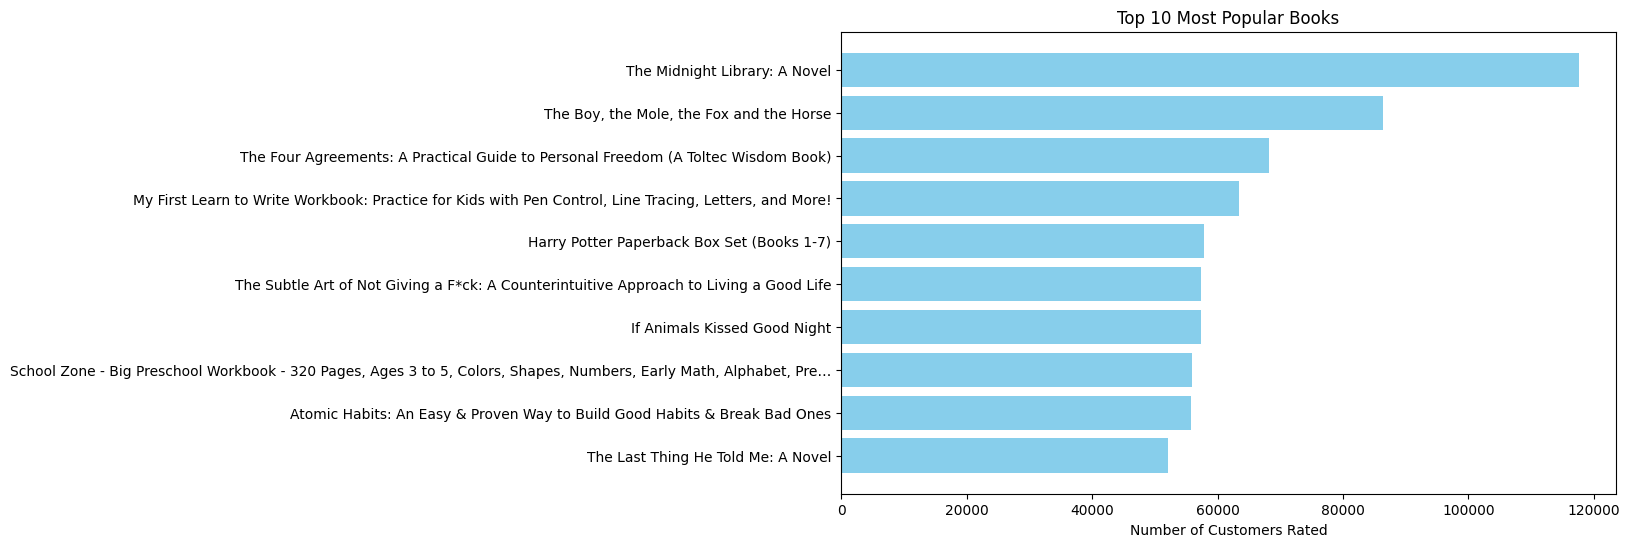

In [44]:
# Data Visualization
N = 10
top_books = df.sort_values(by='Customers_Rated', ascending=False).head(N)
plt.figure(figsize=(10, 6))
plt.barh(top_books['Book Name'], top_books['Customers_Rated'], color='skyblue')
plt.xlabel('Number of Customers Rated')
plt.title('Top {} Most Popular Books'.format(N))
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular book at the top
plt.show()
